## Load in Packages

In [2]:
import pandas as pd
import numpy as np
import os

### Load in Lockdown Dates to determine cutoff of data

In [3]:
#https://www.kaggle.com/datasets/jcyzag/covid19-lockdown-dates-by-country
lock_down_df = pd.read_csv('C:/Users/Andrew/Documents/Uni Trier/Semester 4/Numerics Seminar/lockdown/countryLockdowndates.csv')
lock_down_df = lock_down_df[['Country/Region', 'Province', 'Date']]

In [4]:
lock_down_df_no_nans = lock_down_df
lock_down_df_no_nans = lock_down_df_no_nans[lock_down_df_no_nans['Date'].notna()]
lock_down_df_no_nans['US_Dates'] = lock_down_df_no_nans.Date.str.slice(3,5) +'/' + lock_down_df_no_nans.Date.str.slice(0,2)  + lock_down_df_no_nans.Date.str.slice(5,10)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_52200\4164669339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lock_down_df_no_nans['US_Dates'] = lock_down_df_no_nans.Date.str.slice(3,5) +'/' + lock_down_df_no_nans.Date.str.slice(0,2)  + lock_down_df_no_nans.Date.str.slice(5,10)


### Load In Population counts from John's Hopkins (JH) Dataset

In [5]:
#https://github.com/CSSEGISandData/COVID-19
pop_count = pd.read_csv('C:/Users/Andrew/Documents/Uni Trier/Semester 4/Numerics Seminar/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv')
#Rename for Consistency with Covid Infection report
pop_count = pop_count.rename(columns={'Country_Region':'Country/Region', 'Province_State':'Province/State'})
#Get Aggregate population based on Country and Province
pop_count_regional = pop_count.groupby(['Country/Region', 'Province/State'], as_index=False).agg({'Population':sum})
#Remove 0 population entries
# pop_count_regional = pop_count_regional[(pop_count_regional != 0).all(1)]
pop_count_country = pop_count.groupby(['Country/Region'], as_index=False).agg({'Population':sum})
pop_count_country = pop_count_country[(pop_count_country != 0).all(1)]

### JH Daily Covid 19 case dataset has incorrect figures and inconsistent labeling

In [6]:
os.chdir('C:/Users/Andrew/Documents/Uni Trier/Semester 4/Numerics Seminar/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/')
Daily_Infected_Regional_Df = pop_count_regional[['Country/Region', 'Province/State']]
for csv_f in os.listdir():
    if csv_f[-8:-4] == '2020':
        if int(csv_f[0:2])  < 4:
            if csv_f == '03-24-2020.csv':
                break 
            tmp_df = pd.read_csv(csv_f)
            #reconcile different naming conventions
            tmp_df = tmp_df.rename(columns={'Country_Region':'Country/Region', 'Province_State':'Province/State'})
            tmp_df = tmp_df[['Province/State', 'Country/Region', 'Confirmed']]
            #Inconsistent Naming
            tmp_df = tmp_df.replace('Mainland China', 'China')
            
            # add_rows = tmp_df
            # add_rows = add_rows['Province/State'].isin(Daily_Infected_Regional_Df['Province/State'])
            # if add_rows[~add_rows].to_list():
            #     add_rows = tmp_df[~add_rows][['Country/Region','Province/State']]
            #     add_rows[list(Daily_Infected_Regional_Df.columns[2:])] = pd.DataFrame([np.zeros(len(list(Daily_Infected_Regional_Df.columns[2:])))], index=add_rows.index)
            #     Daily_Infected_Regional_Df = pd.concat([Daily_Infected_Regional_Df, add_rows])
            Daily_Infected_Regional_Df = pd.merge(Daily_Infected_Regional_Df, tmp_df, how='left', left_on=['Country/Region', 'Province/State'], right_on=['Country/Region', 'Province/State'])
            Daily_Infected_Regional_Df['Confirmed'] = Daily_Infected_Regional_Df.Confirmed.replace(np.nan, 0)
            Daily_Infected_Regional_Df = Daily_Infected_Regional_Df.rename(columns={'Confirmed':csv_f[:-4]})

In [7]:
Daily_Infected_Country_Df = Daily_Infected_Regional_Df.groupby(['Country/Region'], as_index=False).sum()
Daily_Infected_Country_Df

,Country/Region,01-22-2020,01-23-2020,01-24-2020,01-25-2020,01-26-2020,01-27-2020,01-28-2020,01-29-2020,01-30-2020,...,03-14-2020,03-15-2020,03-16-2020,03-17-2020,03-18-2020,03-19-2020,03-20-2020,03-21-2020,03-22-2020,03-23-2020
0,Australia,0.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,9.0,...,250.0,297.0,377.0,452.0,568.0,681.0,791.0,1071.0,1490.0,1682.0
1,Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Canada,0.0,0.0,0.0,0.0,3.0,3.0,4.0,4.0,4.0,...,451.0,547.0,700.0,854.0,1097.0,1349.0,1692.0,2196.0,2652.0,3297.0
4,Chile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,China,994.0,1088.0,1477.0,2196.0,3180.0,4382.0,9204.0,9840.0,13300.0,...,150108.0,150150.0,150184.0,150210.0,150255.0,150312.0,150406.0,150461.0,150562.0,150656.0
6,Colombia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Denmark,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,11.0,18.0,47.0,58.0,74.0,82.0,94.0,119.0,122.0
8,France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,14.0,17.0,31.0,9.0,15.0,20.0,26.0,199.0,20120.0
9,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### JH also provides a (correct) time series version of their data

In [8]:
ts_df =pd.read_csv('C:/Users/Andrew/Documents/Uni Trier/Semester 4/Numerics Seminar/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
ts_df.drop(['Lat', 'Long'], axis=1, inplace=True)
#Check for Nan values in the count 
ts_df.loc[:,ts_df.columns[2:]].isnull().values.any()
ts_df = ts_df.groupby(['Country/Region'], as_index=False).sum()

In [9]:
#update columns for consistency 
updated_date_col = ['Country/Region']
for x in list(ts_df.columns):
    if len(x) < 7:
        updated_date_col.append('0' + x[0:2] + '0' + x[2:4] + '20' + x[4:])
    if len(x) == 7:
        if x[1] == '/':
            updated_date_col.append('0' + x[:5] + '20' + x[5:])
        if x[1] != '/':
            updated_date_col.append(x[:3] + '0' + x[3:5] + '20' + x[5:])
    if len(x) == 8:
        updated_date_col.append(x[:6]+ '20' + x[6:])
ts_df.columns = updated_date_col

In [10]:
ts_df.loc[ts_df['Country/Region'] == 'Germany']


,Country/Region,01/22/2020,01/23/2020,01/24/2020,01/25/2020,01/26/2020,01/27/2020,01/28/2020,01/29/2020,01/30/2020,...,11/21/2022,11/22/2022,11/23/2022,11/24/2022,11/25/2022,11/26/2022,11/27/2022,11/28/2022,11/29/2022,11/30/2022
67,Germany,0,0,0,0,0,1,4,4,4,...,36247081,36280371,36318461,36348477,36373164,36373164,36373165,36419717,36463485,36499600


In [11]:
Germany_Infections = ts_df.loc[ts_df['Country/Region'] == 'Germany'].drop(['Country/Region'], axis=1)
first_infection ='01/27/2020'
Germany_Infections =Germany_Infections[ts_df.columns[list(ts_df.columns).index(first_infection):]]

c:\Users\Andrew\miniconda3\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_52200\3687755389.py:12: RuntimeWarning: overflow encountered in double_scalars
  S = -alpha * y[0] * y[1] / N
C:\Users\Andrew\AppData\Local\Temp\ipykernel_52200\3687755389.py:13: RuntimeWarning: overflow encountered in double_scalars
  R = beta * y[1]
c:\Users\Andrew\miniconda3\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


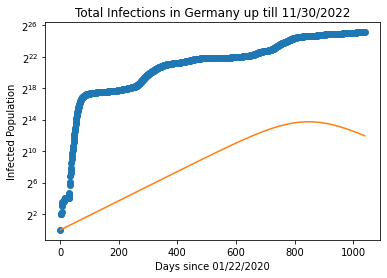

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

ydata = Germany_Infections.to_numpy()[0]
xdata = [x for x in range(1, len(Germany_Infections.to_numpy()[0])+1)]

ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

def sir_model(y, x, alpha, beta):
    S = -alpha * y[0] * y[1] / N
    R = beta * y[1]
    I = -(S + R)
    return S, I, R

def fit_odeint(x, alpha, beta):
    return integrate.odeint(sir_model, (S0, I0, R0), x, args=(alpha, beta))[:,1]

N = pop_count_country.loc[pop_count_country['Country/Region'] == 'Germany'].Population
I0 = ydata[0]
S0 = N - I0
R0 = 0

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)
plt.ticklabel_format(style='plain')
plt.plot(xdata, ydata, 'o')
plt.yscale('log',base=2) 
plt.plot(xdata, fitted)
plt.title('Total Infections in Germany up till 11/30/2022')
plt.xlabel('Days since 01/22/2020')
plt.ylabel('Infected Population')
plt.show()

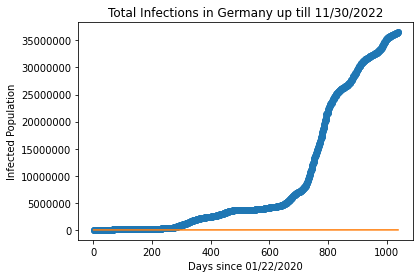

In [13]:
plt.ticklabel_format(style='plain')
plt.plot(xdata, ydata, 'o')
plt.title('Total Infections in Germany up till 11/30/2022')
plt.plot(xdata, fitted)
plt.xlabel('Days since 01/22/2020')
plt.ylabel('Infected Population')
plt.show()

In [14]:
ts_df[column_slice]

NameError: name 'column_slice' is not defined

In [ ]:
ydata
xdata

c:\Users\Andrew\miniconda3\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


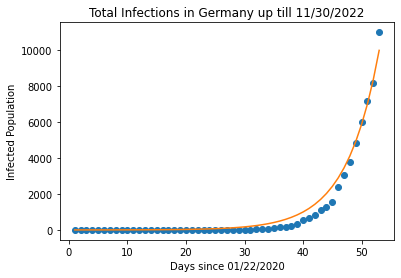

[1.00000000e+00 1.19375484e+00 1.42505064e+00 1.70116111e+00
 2.03076937e+00 2.42424077e+00 2.89394917e+00 3.45466587e+00
 4.12402414e+00 4.92307384e+00 5.87694325e+00 7.01562952e+00
 8.37494176e+00 9.99762736e+00 1.19347162e+01 1.42471253e+01
 1.70075750e+01 2.03028752e+01 2.42366558e+01 2.89326255e+01
 3.45384621e+01 4.12304567e+01 4.92190578e+01 5.87554891e+01
 7.01396502e+01 8.37295478e+01 9.99525540e+01 1.19318846e+02
 1.42437452e+02 1.70035400e+02 2.02980583e+02 2.42309057e+02
 2.89257612e+02 3.45302678e+02 4.12206748e+02 4.92073805e+02
 5.87415493e+02 7.01230095e+02 8.37096830e+02 9.99288403e+02
 1.19290538e+03 1.42403659e+03 1.69995059e+03 2.02932426e+03
 2.42251568e+03 2.89188985e+03 3.45220755e+03 4.12108951e+03
 4.91957061e+03 5.87276129e+03 7.01063729e+03 8.36898228e+03
 9.99051321e+03] -0.0003802152092658665 -0.1774838901536007


In [21]:
# eulers method -> approximate at each step 

#lockdown date 
lock_down_date = lock_down_df_no_nans.loc[lock_down_df_no_nans['Country/Region'] == 'Germany'].US_Dates.reset_index(drop=True)[0] 
first_infection ='01/27/2020'
column_slice = list(ts_df.columns)[list(ts_df.columns).index(first_infection):list(ts_df.columns).index(lock_down_date)]
column_slice = ['Country/Region'] + column_slice
Germany_Infections_no_lockdown = ts_df[column_slice].loc[ts_df[column_slice]['Country/Region'] == 'Germany'].drop(['Country/Region'], axis=1)

ydata = Germany_Infections_no_lockdown.to_numpy()[0]
xdata = [x for x in range(1, len(Germany_Infections_no_lockdown.to_numpy()[0])+1)]

def sir_model(y, x, alpha, beta):
    S = -alpha * y[0] * y[1] / N
    R = beta * y[1]
    I = -(S + R)
    return S, I, R

def fit_odeint(x, alpha, beta):
    return integrate.odeint(sir_model, (S0, I0, R0), x, args=(alpha, beta))[:,1]


N = pop_count_country.loc[pop_count_country['Country/Region'] == 'Germany'].Population
I0 = ydata[0]
S0 = N - I0
R0 = 0.0

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)
plt.ticklabel_format(style='plain')
plt.plot(xdata, ydata, 'o', label='')
plt.plot(xdata, fitted)
# plt.yscale('log',base=2) 
plt.title('Total Infections in Germany up till 11/30/2022')
plt.xlabel('Days since 01/22/2020')
plt.ylabel('Infected Population')
plt.show()
print(fitted, *popt)

In [22]:
len(fitted)

53

In [ ]:
# Euler method python program

# function to be solved
def f(x,y):
    return x+y

# or
# f = lambda x: x+y

# Euler method
def euler(x0,y0,xn,n):
    
    # Calculating step size
    h = (xn-x0)/n
    

    for i in range(n):
        slope = f(x0, y0)
        yn = y0 + h * slope
        y0 = yn
        x0 = x0+h
    

# Inputs
print('Enter initial conditions:')
x0 = float(input('x0 = '))
y0 = float(input('y0 = '))

print('Enter calculation point: ')
xn = float(input('xn = '))

print('Enter number of steps:')
step = int(input('Number of steps = '))

# Euler method call
euler(x0,y0,xn,step)